In [1]:
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected=True)
import numpy as np

import random
import pandas as pd
from IPython.display import display, Math

from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from scipy.stats import norm 
from bokeh import plotting as pl
from bokeh.models import HoverTool, Arrow, OpenHead, NormalHead, VeeHead, Label
from bokeh.models.glyphs import Text
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
output_notebook()
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



Loading BokehJS ...

In this notebook we are going to look at the various metrics that we can use for evaluating our regression machine learning modules. This a crucial topic since in most scenarios when you talk about the success of your model, you will be presenting these metrics as a quantitative measure of that success. 

We shall be talking about the following regression metrics- 

1)  Mean square error (MSE) <br>
2)  Root mean square error (RMSE)<br>
3)  Mean absolute error (MAE)<br>
4)  R-squared error ($\text{R}^2$)<br>

To do all this first we are going to define a regression problem.Then we are going to fit a linear regression model to it, get predicted values from it and then use our metrics to see how well it works. So lets being by first defining our regression problem 

Suppose you work in the construction industry, you are tasked with finding a appropriate length beam to hold a large amount of weight. You ran a few experiments with various lengths of steel beam and they broken at certain weights. You recorded those and plotted them. The plot below represents the data that you collected.*

*Note this is artificial data, it was generated for purposes of demonstration. 


In [2]:
weight = np.array([ 90.3, 113.8, 149.7, 167.1,
       164.6, 184.7, 152.8, 218.0,
       165.6, 225.7])
length_beam= np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])



We are going to calculate each value "by hand" and by sci-kit learn as well.  Additional we are going to move our data points around to

In [3]:
tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        

fig = pl.figure(plot_width=400, plot_height=400, tools = tools_to_show)
fig.circle(length_beam, weight, size =10)
hover = fig.select(dict(type=HoverTool))
hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
fig.xaxis.axis_label = "Length of beam (cm)"
fig.yaxis.axis_label = "Max Weight (kg)"
show(fig)

In [4]:
lr = linear_model.LinearRegression()

# fitting a linear regression model 
lr.fit(length_beam.reshape(10,1), weight.reshape(10,1))

# predicted values
pred_values = lr.predict(length_beam.reshape(10,1))
pred_y = lr.coef_[0]*length_beam  

tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        

fig = pl.figure(plot_width=400, plot_height=400, tools = tools_to_show)
fig.circle(length_beam, weight, size =10)
fig.line(length_beam,pred_values.reshape(10,), color = "red", line_width =4)
hover = fig.select(dict(type=HoverTool))
hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
fig.xaxis.axis_label = "Length of beam (cm)"
fig.yaxis.axis_label = "Max Weight (kg)"
show(fig)

From the model we are able to get the predicted values. This is captured in the array labeled 'pred_values'. This is the red line in our plot. The blue points are the actual values.  Now we can use the various metrics to evaluate the model. Remember, never compare the value of one metric to the value of another metric. They are defined in different ways. Each metric will have its strengths and weaknesses. The idea is to make sure that we can   So we begin with root mean square (RMS)


##  Mean square error (MSE)
The mean square error is defined as - 

$\text{MSE} =  \dfrac{1}{\text{N}} \sum \limits_{i = 1}^{i =N}( \text {predicted values} - \text{actual values})^2 $

where- <br>

N - total number of points in the dataset. In our current dataset we have 10 points. Hence N will be 10. 

We can calculate the mean squared error "by hand" i.e write our own function for it, but just to show it works from sklearn, we will use the sklearn.metrics package for this purpose. 


In [5]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(weight, pred_values.reshape(10,1))
print("mean squared error for the linear regression model {}".format(MSE))

mean squared error for the linear regression model 450.1398545454546


You can see the value is rather large. This is because we are taking the square of the difference between the actual value and predicted value, hence even small differences will be magnified. One precaution we need to take with MSE is to keep in mind that they are very sensitive to outliers, for example, if we have a single point far away from a set of points, the error from that outlier point will dominate the MSE value hence, we must remove outlier point or use another metric that does not get affected by outliers.

 A closely related metric to the mean squared error is the root mean squared error (RMSE)
 
 # Root mean squared error (RMSE)
 
 The root mean squared error is simply the square root of the MSE value- 
 
 $\text{RMSE} =  \sqrt{\dfrac{1}{\text{N}} \sum \limits_{i = 1}^{i =N}( \text {predicted values} - \text{actual values})^2 }$


Why consider using the RMSE? Well for one thing it is easily interpretable. The RMSE has the same units as your predicted and actual values. For example in our case the unit of our predicted and actual values is the weight i.e kg . MSE is in the units of kg$^2$ which doesnt mean much to us but the RMSE is proportional to kg. 

RMSE also represents the average distance between the predicted and actually values. 

We implement RMSE by just taking the root of MSE 


In [6]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(weight, pred_values.reshape(10,1)))

print("root mean squared error for the linear regression model {}".format(RMSE))


root mean squared error for the linear regression model 21.216499582764698


So how about a metric that is a little more robust to outliers? Lets look at mean absolute error for that. 

## Mean absolute error (MAE)

Mathematically mean absolute error is defined as - 
$\text{MAE} =  \dfrac{1}{\text{N}} \sum \limits_{i = 1}^{i =N} \text{ abs}( \text {predicted values} - \text{actual values}) $

where - <br>
abs() represent the absolute value of the number. 

The MAE is just the sum of the difference between the predicted and the actual values. This has the advantage that it is not as sensitive to outlier points as MSE or RMSE. 


We can calculate the MAE in the following manner - 


In [7]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(weight, pred_values.reshape(10,1))

print(" mean aboslute for the linear regression model {}".format(MAE))


 mean aboslute for the linear regression model 19.17527272727273


MAE, MSE and RMSE are absolute metrics they, are defined as measures of error from the regression line to the actual data points. The next metric we will be looking at will be relative measure of error. 

## R-squared 

The last metric we are going to look at is $R^2$. In order to define $R^2$ we need to first define something called total sum of square. 

Total sum of squares =  sum of squares of regression + sum of squares of error 


where - 

Sum of squares of regression - is defined as  $\sum \limits_{i =1}^{i =N}(\text{actual points }  -  \text{mean of all actual points} )^2$. This sum of squares represents the sum of the difference between the mean value of the points and the actual points. 

Sum of squares of error  - is defined as  $\sum \limits_{i =1}^{i =N}(\text{actual points }-\text{predicted points }  )^2$. This is just the sum of the squares of the distance between the our fit line and the actual data points. 

Combining both these sums we get the total sum of squares. 

So $R^2$ is defined as - 

$R^2$ = 1- $\dfrac{\text{Sum of squares of regression} }{\text{Total sum of squares} }$

We call it a relative measure since we are looking what fraction of  the total sum of squares is the sum of squares of regression. Since $R^2$ is a ratio, the value will vary between 0 and 1. $R^2  = 1$ would mean that data points fit perfectly to the regression line. $R^2 = 0$ mean that there is really no relationship between our x and y variable. We are going to first calculate $R^2$ for our data then see some other examples of $R^2$

$R^2$ for our current data can be calculated using- 



In [8]:
from sklearn.metrics import r2_score

r_squared = r2_score(weight, pred_values.reshape(10,1))

print(" r_squared for the linear regression model {}".format(r_squared))


 r_squared for the linear regression model 0.7084518645573077


We say that $R^2$ measures the goodness of fit of a model. Hence once we get a value of $R^2$ we can talk about how well our independent variable (which is the length of beam in our case ) is correlated to our dependent variable(which is the max weight ). 

Now lets us look at some examples where we have different values of $R^2$

Suppose we have data such that- 

y = ([111.4, 122.9,134.4, 130.4,157.5,169.3,185.5,192.5, 203.5, 200.7])


In [9]:
y = np.array([111.4, 122.9,134.4, 130.4,157.5,169.3,185.5,192.5, 203.5, 200.7])
x = length_beam
lr = linear_model.LinearRegression()

# fitting a linear regression model 
lr.fit(length_beam.reshape(10,1), y.reshape(10,1))

# predicted values
pred_values_new = lr.predict(length_beam.reshape(10,1))
pred_y_new = lr.coef_[0]*length_beam  

tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        

fig = pl.figure(plot_width=400, plot_height=400, tools = tools_to_show)
fig.circle(length_beam, y, size =10)
fig.line(length_beam,pred_values_new.reshape(10,), color = "red", line_width =4)
hover = fig.select(dict(type=HoverTool))
hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
fig.xaxis.axis_label = "Length of beam (cm)"
fig.yaxis.axis_label = "Max Weight (kg)"
glyph = Label(x= 50.0, y = 200.0, text = "r-squared = "+ str(np.round(r2_score(y, pred_values_new), 2)))
fig.add_layout(glyph)
show(fig)

# high r-squared score
print(" r-squared square for this distribution of points {}".format(r2_score(y, pred_values_new)))




 r-squared square for this distribution of points 0.9621125428397651


In [10]:
y_low = np.array([111.4, 122.9,134.4, 130.4,157.5,129.3,120.5,132.5, 103.5, 140.7])
x = length_beam
lr = linear_model.LinearRegression()

# fitting a linear regression model 
lr.fit(length_beam.reshape(10,1), y_low.reshape(10,1))

# predicted values
pred_values_new = lr.predict(length_beam.reshape(10,1))
pred_y_new = lr.coef_[0]*length_beam  

tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        

fig = pl.figure(plot_width=400, plot_height=400, tools = tools_to_show)
fig.circle(length_beam, y_low, size =10)
fig.line(length_beam,pred_values_new.reshape(10,), color = "red", line_width =4)
hover = fig.select(dict(type=HoverTool))
hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
fig.xaxis.axis_label = "Length of beam (cm)"
fig.yaxis.axis_label = "Max Weight (kg)"
glyph = Label(x= 50.0, y = 150.0, text = "r-squared = "+ str(np.round(r2_score(y_low, pred_values_new), 2)))
fig.add_layout(glyph)

show(fig)

# high r-squared score
print(" r-squared square for this distribution of points {}".format(r2_score(y_low, pred_values_new)))



 r-squared square for this distribution of points 0.005391346981258427


So typically the higher your r-squared is the better. Note that are only talking about 1 dependent variable here i.e the max weight we are not going into multiple dependent variables here which would be a multi variable linear regression problem. In that rather than using $R^2$ we would be using adjusted $R^2$. It is a modified version of $R^2$. 

With that we are going to close this note book. Now that are aware of the type of metrics that we can use, we can starting diving into some machine learning algorithms 


## Rough work - generating data 



In [11]:
rand_value = np.random.normal(3,20, 10 )

In [12]:
rand_dev = 100- rand_value
rand_dev

array([101.05551507,  88.5471414 , 110.86814634,  97.04015602,
        94.33813897, 126.34072971,  66.74097748,  79.24977148,
        60.06536223,  96.02902437])

In [13]:
x= np.arange(50, 100, 5)
y= (2*x)+ 20-rand_value


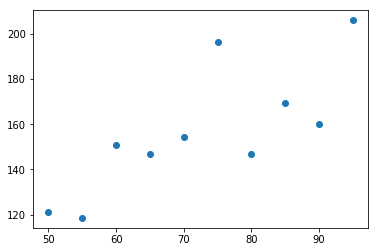

In [14]:
plt.scatter(x,y)

In [15]:
y2 = np.array([ 90.39966993, 113.86520284, 149.77039211, 167.10896843,
       164.62539558, 184.72625195, 152.82318237, 218.02529295,
       165.60147046, 225.78531444])

In [16]:
x

array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

In [17]:
y

array([121.05551507, 118.5471414 , 150.86814634, 147.04015602,
       154.33813897, 196.34072971, 146.74097748, 169.24977148,
       160.06536223, 206.02902437])

In [18]:
tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        


fig = pl.figure(plot_width=400, plot_height=400, tools = tool_2)
fig.circle(length_beam, weight, size =10)
fig.line(length_beam,pred_y, color = "red", line_width =4)
hover = fig.select(dict(type=HoverTool))
hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]

fig.xaxis.axis_label = "Length of beam (cm)"
fig.yaxis.axis_label = "Max Weight (kg)"
show(fig)

NameError: name 'tool_2' is not defined